# Load the master table

In [1]:
from vulnerable_populations.pipeline import Granularity

granularity = Granularity.COUNTY_LEVEL

In [2]:
covid_19_master = catalog.load(f"mod_covid_19_{granularity.value}_master")
covid_19_master

2020-06-14 19:38:01,951 - kedro.io.data_catalog - INFO - Loading data from `mod_covid_19_county_level_master` (ParquetDataSet)...


,Insurance Type (Relevant for Clinical Data from Claims Only),FIPS County Code,County,State,State Code,Population,Deaths from COVID-19,Cases of COVID-19,Deaths from Covid 19 Per 100K Population,Cases of Covid 19 Per 100K Population,...,Children on Free or Reduced Lunch,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Native Hawaiian or Other Pacific Islander,Non-Hispanic White,Other race,2 or more races,Racial / Ethnic Minority
0,All,49055,Wayne,Utah,UT,2690.0,0.0,0.0,0.0,0.0,...,0.500,0.003,0.005,0.003,0.059,0.013,0.912,0.000,0.006,0.083
1,All,21091,Hancock,Kentucky,KY,8758.0,0.0,7.0,0.0,79.0,...,0.510,0.001,0.007,0.009,0.015,0.000,0.956,0.000,0.011,0.033
2,All,27077,Lake of the Woods,Minnesota,MN,3758.0,0.0,0.0,0.0,0.0,...,0.532,0.003,0.008,0.000,0.017,0.000,0.930,0.000,0.041,0.028
3,All,19129,Mills,Iowa,IA,15063.0,0.0,22.0,0.0,146.0,...,0.347,0.007,0.003,0.009,0.030,0.000,0.943,0.000,0.008,0.049
4,All,49033,Rich,Utah,UT,2464.0,0.0,0.0,0.0,0.0,...,0.396,0.000,0.000,0.000,0.109,0.000,0.865,0.026,0.000,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,All,22007,Assumption Parish,Louisiana,LA,22300.0,14.0,258.0,62.0,1156.0,...,0.681,0.004,0.002,0.299,0.029,0.000,0.656,0.000,0.011,0.333
3134,All,27093,Meeker,Minnesota,MN,23141.0,1.0,50.0,4.0,216.0,...,0.370,0.001,0.003,0.006,0.038,0.000,0.942,0.001,0.010,0.048
3135,All,37033,Caswell,North Carolina,NC,22698.0,1.0,101.0,4.0,444.0,...,0.809,0.002,0.007,0.329,0.038,0.002,0.612,0.000,0.010,0.378
3136,All,51053,Dinwiddie,Virginia,VA,28529.0,0.0,101.0,0.0,354.0,...,0.521,0.000,0.007,0.320,0.034,0.001,0.618,0.005,0.014,0.362


In [3]:
from datetime import datetime

from kedro.io.core import VERSION_FORMAT

last_load_version = datetime.strptime(
    getattr(
        catalog.datasets, f"raw_csbh_{granularity.value}_data"
    ).resolve_load_version(),
    VERSION_FORMAT,
)
print(
    "Center for Societal Benefit through Healthcare, McKinsey & Company. "
    "Vulnerable Populations Dashboard. https://csbh-dashboard.mckinsey.digital/#/. "
    f"Accessed on {last_load_version.date()}."
)

Center for Societal Benefit through Healthcare, McKinsey & Company. Vulnerable Populations Dashboard. https://csbh-dashboard.mckinsey.digital/#/. Accessed on 2020-06-13.


# Plot a diagonal correlation matrix

Adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html.

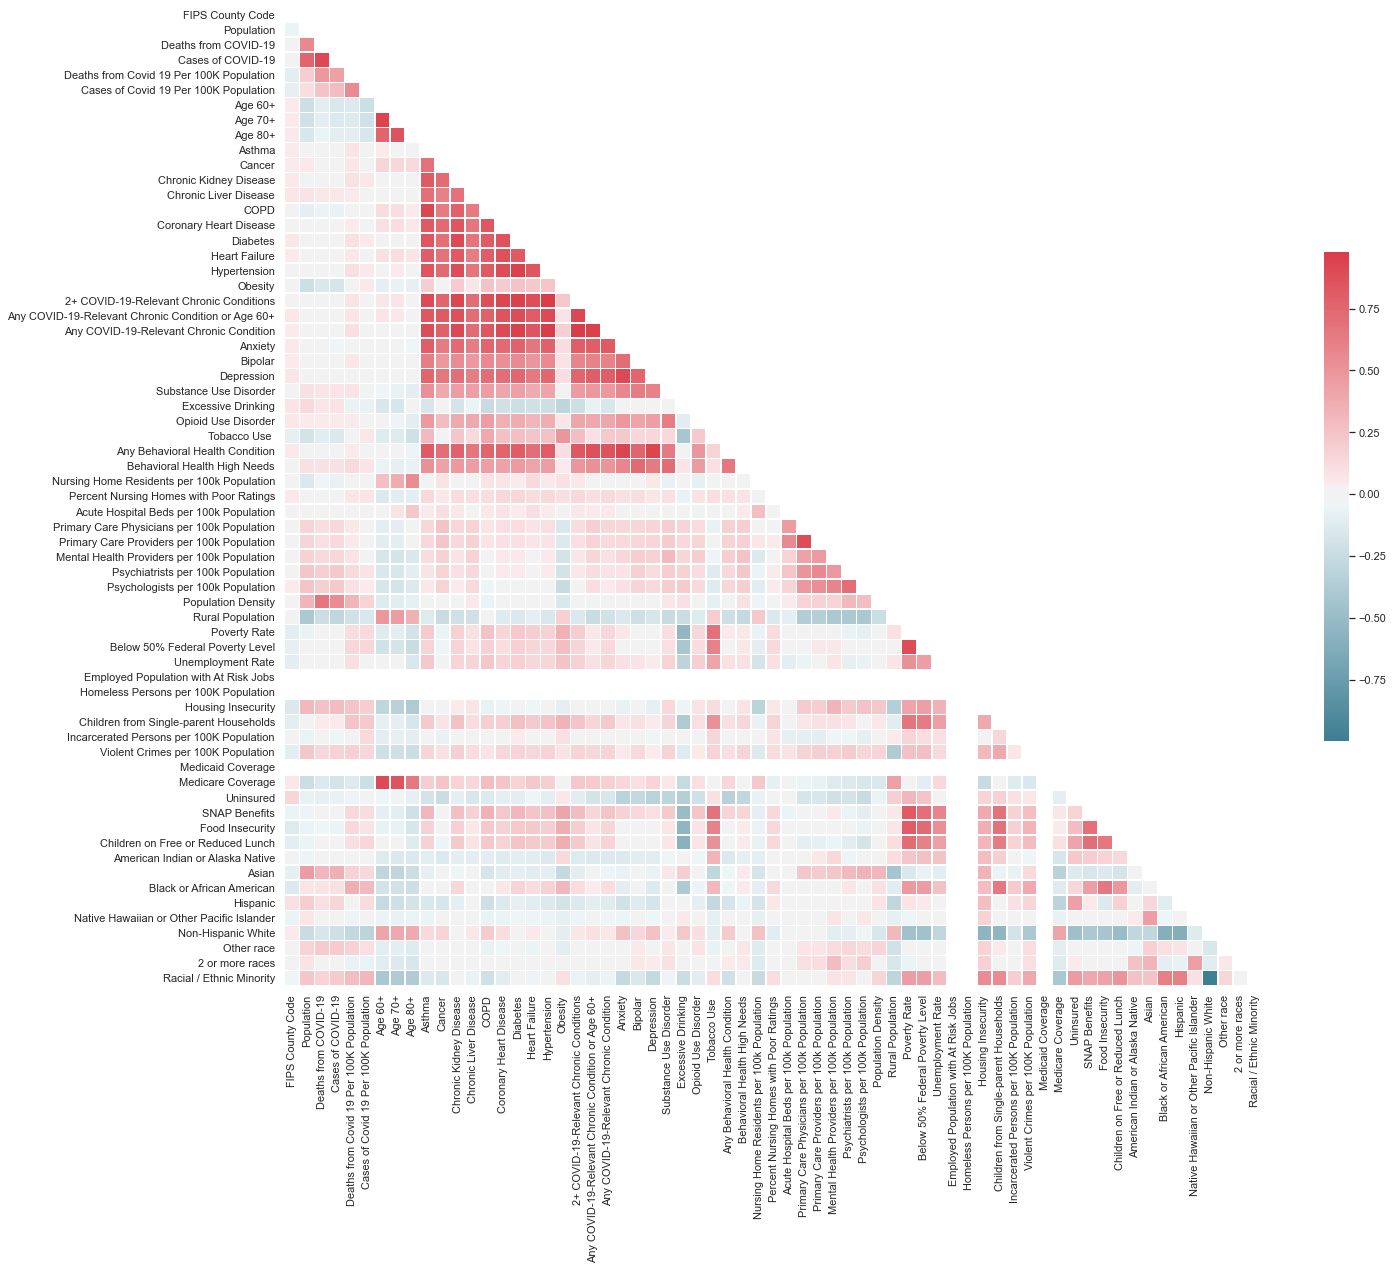

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = covid_19_master.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Split master table into feature matrix and selected target array

In [5]:
from enum import Enum


class Target(Enum):
    DEATHS = "Deaths from Covid 19 Per 100K Population"
    CASES = "Cases of Covid 19 Per 100K Population"

In [6]:
X = covid_19_master.loc[:, "Age 60+":]
y = covid_19_master[Target.CASES.value]
display(X, y)

,Age 60+,Age 70+,Age 80+,Asthma,Cancer,Chronic Kidney Disease,Chronic Liver Disease,COPD,Coronary Heart Disease,Diabetes,...,Children on Free or Reduced Lunch,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Native Hawaiian or Other Pacific Islander,Non-Hispanic White,Other race,2 or more races,Racial / Ethnic Minority
0,0.282,0.138,0.036,0.026,0.026,0.018,0.009,0.018,0.019,0.029,...,0.500,0.003,0.005,0.003,0.059,0.013,0.912,0.000,0.006,0.083
1,0.229,0.111,0.032,0.038,0.019,0.044,0.011,0.035,0.065,0.084,...,0.510,0.001,0.007,0.009,0.015,0.000,0.956,0.000,0.011,0.033
2,0.320,0.142,0.053,0.045,0.019,0.038,0.006,0.045,0.064,0.064,...,0.532,0.003,0.008,0.000,0.017,0.000,0.930,0.000,0.041,0.028
3,0.248,0.108,0.043,0.046,0.028,0.056,0.009,0.041,0.075,0.088,...,0.347,0.007,0.003,0.009,0.030,0.000,0.943,0.000,0.008,0.049
4,0.237,0.125,0.040,0.046,0.009,0.028,0.009,0.019,0.019,0.037,...,0.396,0.000,0.000,0.000,0.109,0.000,0.865,0.026,0.000,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,0.235,0.108,0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.681,0.004,0.002,0.299,0.029,0.000,0.656,0.000,0.011,0.333
3134,0.267,0.132,0.048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.370,0.001,0.003,0.006,0.038,0.000,0.942,0.001,0.010,0.048
3135,0.276,0.138,0.049,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.809,0.002,0.007,0.329,0.038,0.002,0.612,0.000,0.010,0.378
3136,0.229,0.104,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.521,0.000,0.007,0.320,0.034,0.001,0.618,0.005,0.014,0.362


0          0.0
1         79.0
2          0.0
3        146.0
4          0.0
         ...  
3133    1156.0
3134     216.0
3135     444.0
3136     354.0
3137     324.0
Name: Cases of Covid 19 Per 100K Population, Length: 3138, dtype: float64

# Visualize feature importances

Adapted from https://github.com/slundberg/shap#tree-ensemble-example-with-treeexplainer-xgboostlightgbmcatboostscikit-learnpyspark-models.

In [7]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing


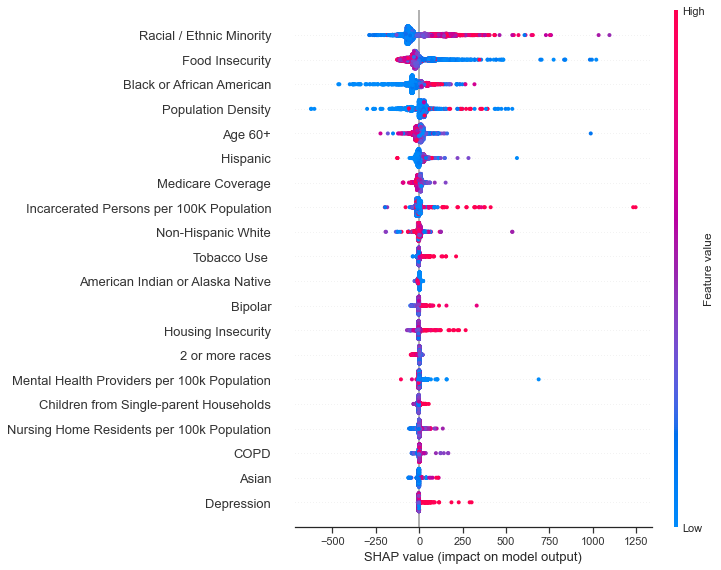

In [8]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

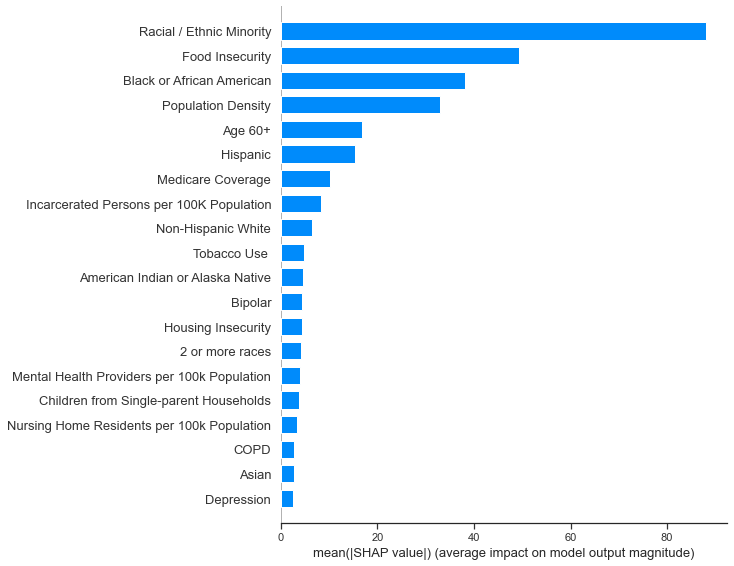

In [9]:
shap.summary_plot(shap_values, X, plot_type="bar")

# Print and plot evaluation metrics (before feature selection)

In [10]:
eval_result = xgboost.cv({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 1000,
                         callbacks=[xgboost.callback.print_evaluation(show_stdv=True)])
eval_result.loc[eval_result["test-rmse-mean"].idxmin()]

[0]	train-rmse:752.46918+36.07931	test-rmse:751.45465+75.63556
[1]	train-rmse:747.90440+35.90895	test-rmse:748.60311+75.89436
[2]	train-rmse:743.39109+35.74231	test-rmse:745.77275+76.13308
[3]	train-rmse:738.87181+35.52384	test-rmse:743.09306+76.22459
[4]	train-rmse:734.40676+35.41571	test-rmse:740.30743+76.39169
[5]	train-rmse:730.00572+35.25402	test-rmse:737.86357+76.41122
[6]	train-rmse:725.81049+35.29375	test-rmse:735.38275+76.56672
[7]	train-rmse:721.51504+35.17372	test-rmse:732.86955+76.78526
[8]	train-rmse:717.34861+35.23091	test-rmse:730.42554+76.91498
[9]	train-rmse:713.14372+35.10260	test-rmse:728.01805+77.12688
[10]	train-rmse:709.14585+35.12633	test-rmse:725.72756+77.19571
[11]	train-rmse:705.01410+34.96218	test-rmse:723.36967+77.43146
[12]	train-rmse:700.90867+34.70788	test-rmse:721.17747+77.58888
[13]	train-rmse:696.92537+34.55430	test-rmse:718.95998+77.84389
[14]	train-rmse:692.96322+34.34334	test-rmse:716.72471+78.14512
[15]	train-rmse:688.97011+34.16948	test-rmse:714.6

[128]	train-rmse:412.03974+19.94294	test-rmse:606.40606+79.76193
[129]	train-rmse:410.47363+19.90615	test-rmse:606.07081+79.67875
[130]	train-rmse:408.96553+19.78254	test-rmse:605.81108+79.63989
[131]	train-rmse:407.50396+19.73434	test-rmse:605.55784+79.55086
[132]	train-rmse:406.06635+19.53807	test-rmse:605.14259+79.62778
[133]	train-rmse:404.70350+19.54801	test-rmse:604.66735+79.47654
[134]	train-rmse:403.33524+19.36743	test-rmse:604.37397+79.38327
[135]	train-rmse:401.95522+19.23742	test-rmse:604.05491+79.31722
[136]	train-rmse:400.55132+19.04906	test-rmse:603.78557+79.27777
[137]	train-rmse:399.10445+19.01750	test-rmse:603.47627+79.16054
[138]	train-rmse:397.85855+18.94272	test-rmse:603.21639+79.11020
[139]	train-rmse:396.49329+18.88276	test-rmse:602.77051+78.88901
[140]	train-rmse:395.13082+18.73121	test-rmse:602.33930+78.96228
[141]	train-rmse:393.81382+18.55921	test-rmse:601.90551+78.96233
[142]	train-rmse:392.43349+18.53198	test-rmse:601.69062+78.89859
[143]	train-rmse:391.1795

[255]	train-rmse:289.61097+17.01311	test-rmse:583.94706+70.44357
[256]	train-rmse:288.95918+16.95859	test-rmse:583.88810+70.33617
[257]	train-rmse:288.37447+17.00698	test-rmse:583.86961+70.31714
[258]	train-rmse:287.65573+17.03888	test-rmse:583.76836+70.19328
[259]	train-rmse:287.07200+17.16344	test-rmse:583.69777+70.15741
[260]	train-rmse:286.35492+17.20285	test-rmse:583.68157+70.08072
[261]	train-rmse:285.81174+17.25545	test-rmse:583.53290+69.97672
[262]	train-rmse:285.09303+17.25161	test-rmse:583.49936+69.94545
[263]	train-rmse:284.40591+17.20782	test-rmse:583.44108+69.91903
[264]	train-rmse:283.68843+17.24515	test-rmse:583.41669+69.84493
[265]	train-rmse:283.07055+17.14132	test-rmse:583.33664+69.75891
[266]	train-rmse:282.42952+17.11172	test-rmse:583.29649+69.69171
[267]	train-rmse:281.74568+17.19035	test-rmse:583.15866+69.65314
[268]	train-rmse:281.12446+17.19167	test-rmse:583.08353+69.70073
[269]	train-rmse:280.46725+17.17576	test-rmse:583.01104+69.61647
[270]	train-rmse:279.8987

[382]	train-rmse:230.74189+18.22358	test-rmse:579.17611+66.18364
[383]	train-rmse:230.42739+18.28310	test-rmse:579.18133+66.16587
[384]	train-rmse:230.00397+18.19444	test-rmse:579.19255+66.10653
[385]	train-rmse:229.80327+18.17642	test-rmse:579.22838+66.08730
[386]	train-rmse:229.51040+18.13133	test-rmse:579.24406+66.12068
[387]	train-rmse:229.19048+18.09516	test-rmse:579.24068+66.06964
[388]	train-rmse:228.86976+18.12499	test-rmse:579.22086+66.05683
[389]	train-rmse:228.63771+18.05663	test-rmse:579.25742+66.04382
[390]	train-rmse:228.36510+18.05241	test-rmse:579.21765+66.03835
[391]	train-rmse:228.12092+18.08378	test-rmse:579.22342+66.00201
[392]	train-rmse:227.77349+17.94873	test-rmse:579.24475+66.00231
[393]	train-rmse:227.40093+17.86693	test-rmse:579.25894+65.92287
[394]	train-rmse:227.04854+17.84471	test-rmse:579.26909+65.87151
[395]	train-rmse:226.78595+17.79950	test-rmse:579.26121+65.88892
[396]	train-rmse:226.52352+17.79159	test-rmse:579.21896+65.88420
[397]	train-rmse:226.2466

[509]	train-rmse:197.81917+18.21510	test-rmse:578.82881+64.49561
[510]	train-rmse:197.55661+18.18039	test-rmse:578.81445+64.46530
[511]	train-rmse:197.27063+18.10387	test-rmse:578.76846+64.46415
[512]	train-rmse:197.06230+18.07836	test-rmse:578.75345+64.47438
[513]	train-rmse:196.88090+18.05792	test-rmse:578.74328+64.47092
[514]	train-rmse:196.69273+18.10156	test-rmse:578.72788+64.47558
[515]	train-rmse:196.42672+18.04635	test-rmse:578.68281+64.47889
[516]	train-rmse:196.22002+17.97469	test-rmse:578.67210+64.47434
[517]	train-rmse:195.96300+18.00316	test-rmse:578.63949+64.47011
[518]	train-rmse:195.76059+17.95939	test-rmse:578.62467+64.45695
[519]	train-rmse:195.62029+17.94113	test-rmse:578.61925+64.47487
[520]	train-rmse:195.40611+17.95931	test-rmse:578.59663+64.46729
[521]	train-rmse:195.26941+17.95202	test-rmse:578.58230+64.45221
[522]	train-rmse:195.08295+17.94994	test-rmse:578.56054+64.46784
[523]	train-rmse:194.91776+18.00520	test-rmse:578.55182+64.45477
[524]	train-rmse:194.5796

[636]	train-rmse:174.23817+15.91344	test-rmse:577.42913+64.61518
[637]	train-rmse:174.03827+15.78219	test-rmse:577.42865+64.62565
[638]	train-rmse:173.88653+15.70026	test-rmse:577.42525+64.65295
[639]	train-rmse:173.67654+15.62251	test-rmse:577.39936+64.66144
[640]	train-rmse:173.48097+15.60281	test-rmse:577.38008+64.66870
[641]	train-rmse:173.35529+15.58879	test-rmse:577.37492+64.67261
[642]	train-rmse:173.05669+15.52933	test-rmse:577.36087+64.68795
[643]	train-rmse:172.85188+15.48347	test-rmse:577.35125+64.71396
[644]	train-rmse:172.62963+15.31288	test-rmse:577.36144+64.69892
[645]	train-rmse:172.53161+15.35313	test-rmse:577.34123+64.68416
[646]	train-rmse:172.25828+15.30681	test-rmse:577.31329+64.68851
[647]	train-rmse:172.09096+15.32009	test-rmse:577.30768+64.69207
[648]	train-rmse:171.92059+15.22234	test-rmse:577.31041+64.70851
[649]	train-rmse:171.73796+15.13219	test-rmse:577.28761+64.72582
[650]	train-rmse:171.56688+15.18126	test-rmse:577.25343+64.73168
[651]	train-rmse:171.3204

[763]	train-rmse:154.15341+10.77238	test-rmse:576.37568+64.87182
[764]	train-rmse:154.04957+10.80452	test-rmse:576.37390+64.88169
[765]	train-rmse:153.92490+10.75542	test-rmse:576.35346+64.89845
[766]	train-rmse:153.80861+10.71991	test-rmse:576.32822+64.90769
[767]	train-rmse:153.67897+10.66479	test-rmse:576.33558+64.89213
[768]	train-rmse:153.60163+10.66693	test-rmse:576.31453+64.88413
[769]	train-rmse:153.48858+10.72289	test-rmse:576.31194+64.88388
[770]	train-rmse:153.36649+10.72838	test-rmse:576.31391+64.88947
[771]	train-rmse:153.21292+10.69065	test-rmse:576.29939+64.89232
[772]	train-rmse:153.05557+10.66597	test-rmse:576.31838+64.88358
[773]	train-rmse:152.92530+10.62072	test-rmse:576.31584+64.88105
[774]	train-rmse:152.84046+10.62628	test-rmse:576.31572+64.88667
[775]	train-rmse:152.63303+10.58174	test-rmse:576.30839+64.86913
[776]	train-rmse:152.50991+10.58432	test-rmse:576.31358+64.88821
[777]	train-rmse:152.43578+10.59352	test-rmse:576.30024+64.89199
[778]	train-rmse:152.3364

[890]	train-rmse:139.25672+8.77679	test-rmse:576.00906+64.79534
[891]	train-rmse:139.14485+8.75016	test-rmse:575.99559+64.80675
[892]	train-rmse:139.02833+8.73262	test-rmse:576.00612+64.80373
[893]	train-rmse:138.92113+8.66968	test-rmse:576.02556+64.79782
[894]	train-rmse:138.76515+8.65700	test-rmse:576.03223+64.80883
[895]	train-rmse:138.66510+8.61195	test-rmse:576.02609+64.80360
[896]	train-rmse:138.57832+8.59315	test-rmse:576.02411+64.80604
[897]	train-rmse:138.47280+8.54923	test-rmse:576.02883+64.80614
[898]	train-rmse:138.33131+8.49849	test-rmse:576.03859+64.81153
[899]	train-rmse:138.21857+8.44014	test-rmse:576.05849+64.78793
[900]	train-rmse:138.14456+8.44860	test-rmse:576.06329+64.78606
[901]	train-rmse:138.00495+8.42628	test-rmse:576.03617+64.78465
[902]	train-rmse:137.86128+8.46846	test-rmse:576.02679+64.78930
[903]	train-rmse:137.71492+8.46994	test-rmse:576.02950+64.78308
[904]	train-rmse:137.59471+8.41327	test-rmse:576.03260+64.78484
[905]	train-rmse:137.45683+8.38038	test-

train-rmse-mean    135.659401
train-rmse-std       8.065791
test-rmse-mean     575.985891
test-rmse-std       64.676423
Name: 920, dtype: float64

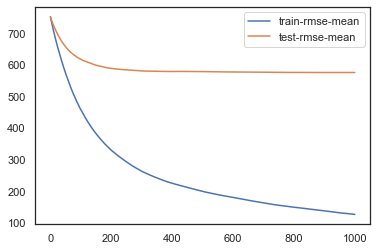

In [11]:
eval_result.plot(y=["train-rmse-mean", "test-rmse-mean"])

# Engineer and eliminate features

### Age

In [12]:
# "Age 60+" -> "Age 70+" -> "Age 80+"
X.drop(columns=["Age 70+", "Age 80+"], inplace=True)

### Chronic Conditions

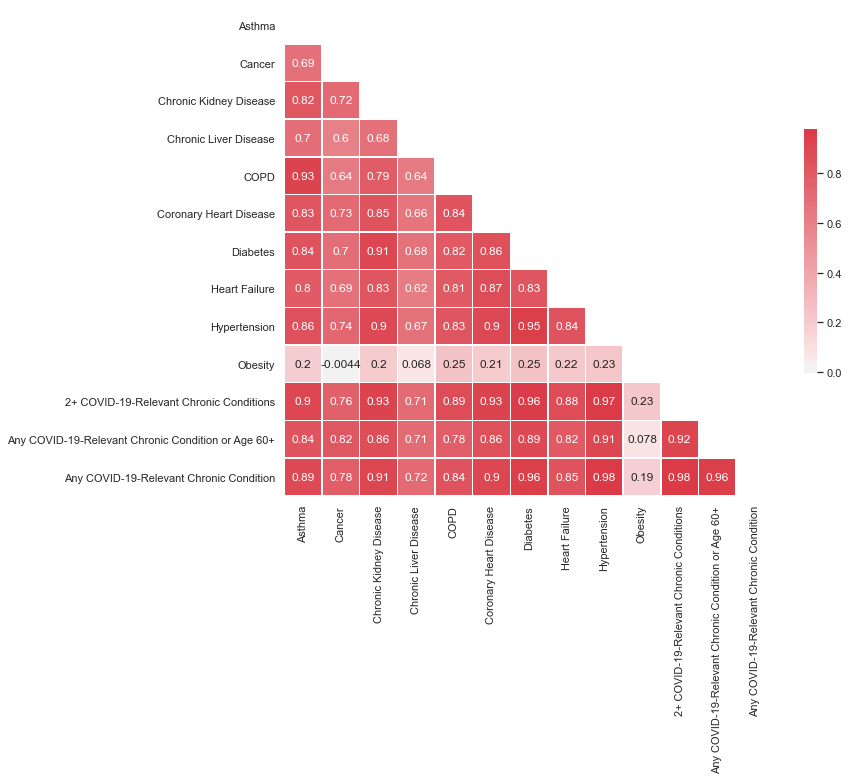

In [13]:
# Subset the correlation matrix
chronic_conditions_corr = covid_19_master.corr().loc[
    "Asthma":"Any COVID-19-Relevant Chronic Condition",
    "Asthma":"Any COVID-19-Relevant Chronic Condition",
]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(chronic_conditions_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(chronic_conditions_corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
X.drop(
    columns=[
        colname
        for colname in X.loc["Asthma":"Any COVID-19-Relevant Chronic Condition"].columns
        if colname in ["Obesity", "Any COVID-19-Relevant Chronic Condition"]
    ],
    inplace=True,
)

### Behavioral Health

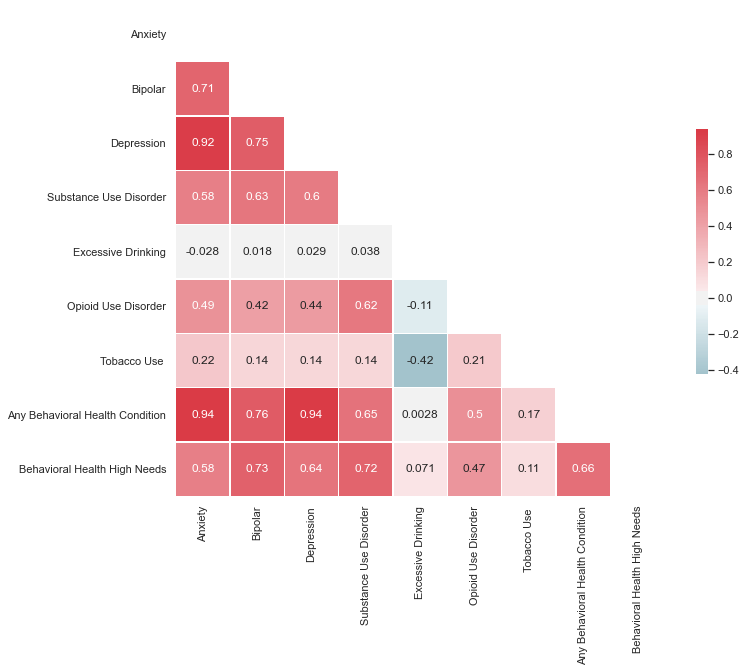

In [15]:
# Subset the correlation matrix
behavioral_health_corr = covid_19_master.corr().loc[
    "Anxiety":"Behavioral Health High Needs",
    "Anxiety":"Behavioral Health High Needs",
]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(behavioral_health_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(behavioral_health_corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
X.drop(columns="Any Behavioral Health Condition", inplace=True)

### Healthcare Supply

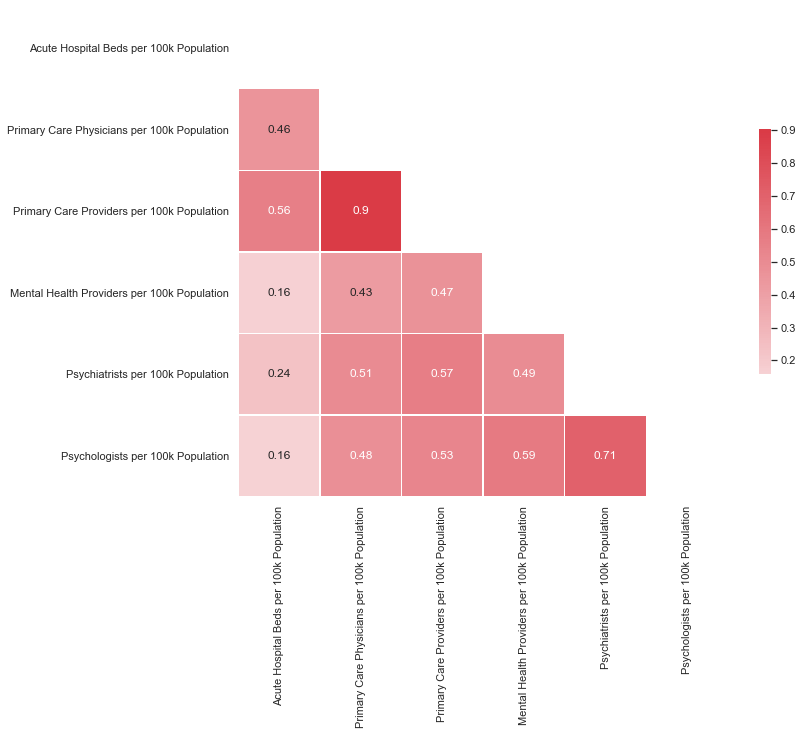

In [17]:
# Subset the correlation matrix
healthcare_supply_corr = covid_19_master.corr().loc[
    "Acute Hospital Beds per 100k Population":"Psychologists per 100k Population",
    "Acute Hospital Beds per 100k Population":"Psychologists per 100k Population",
]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(healthcare_supply_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(healthcare_supply_corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
X["Primary Care Providers per 100k Population"] -= X[
    "Primary Care Physicians per 100k Population"
]
X.rename(
    columns={
        "Primary Care Providers per 100k Population": "Primary Care Mid-Level Providers per 100k Population"
    },
    inplace=True,
)

### Social / Community Factors

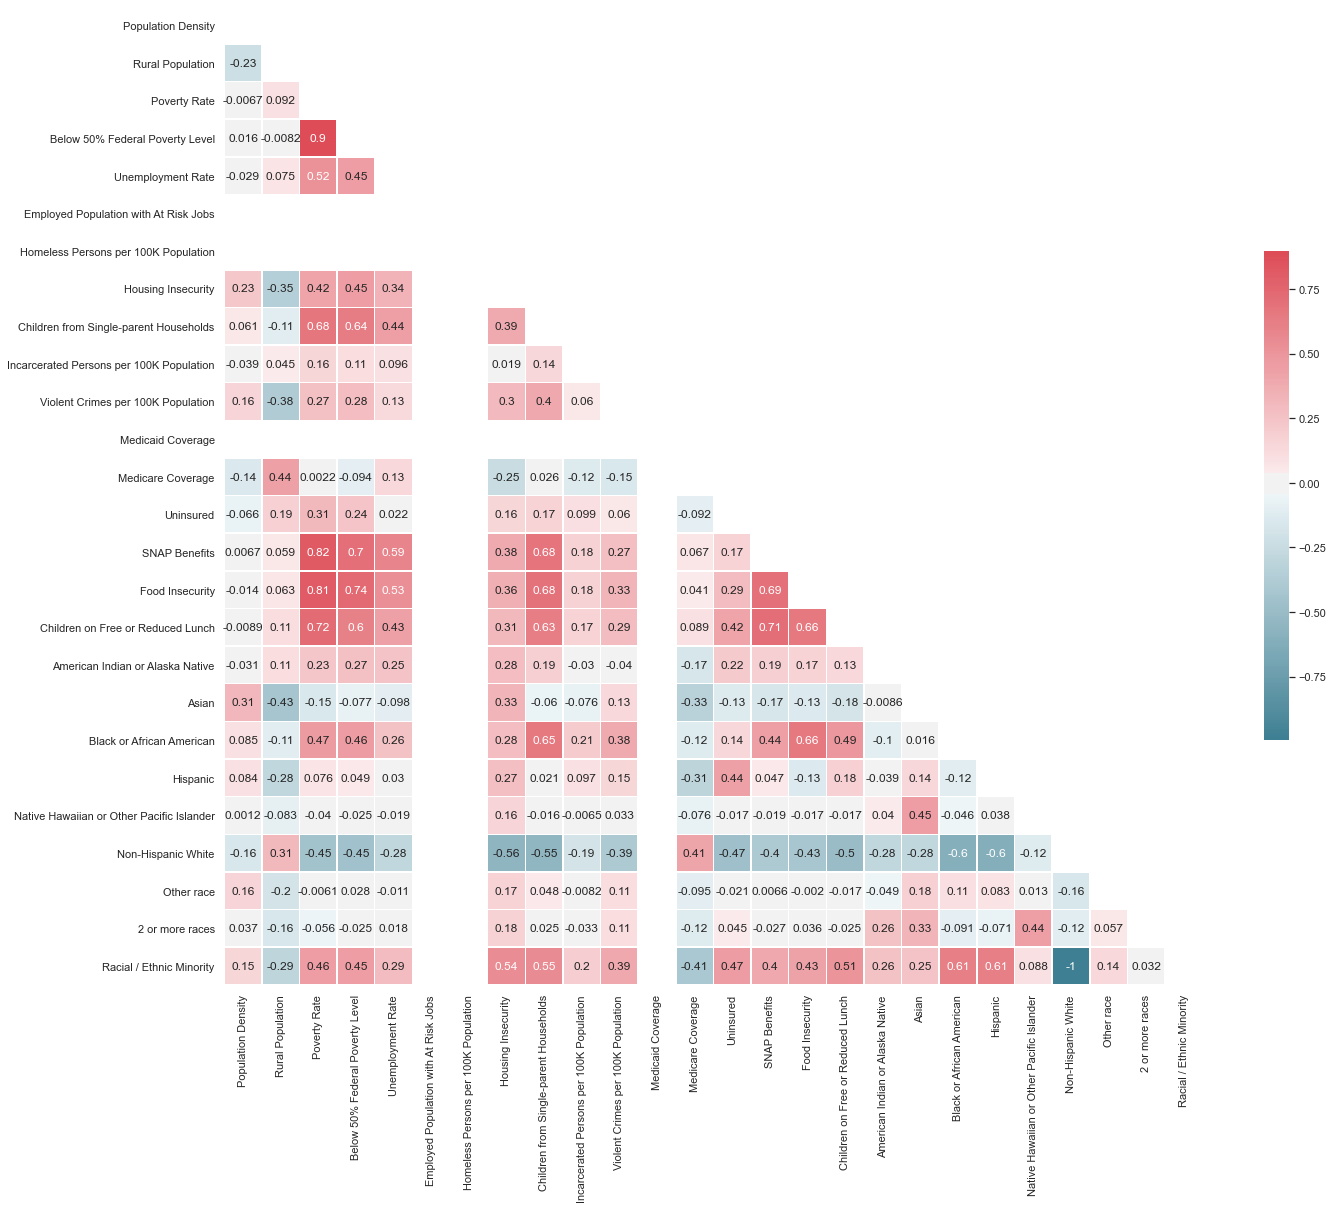

In [19]:
# Subset the correlation matrix
social_community_factors_corr = covid_19_master.corr().loc[
    "Population Density":, "Population Density":
]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(social_community_factors_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(social_community_factors_corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
X["Poverty Rate"] -= X["Below 50% Federal Poverty Level"]
X.rename(
    columns={"Poverty Rate": "50-100% Federal Poverty Level"}, inplace=True,
)

In [21]:
# "Age 60+" -> "Medicare Coverage"
X.drop(columns="Medicare Coverage", inplace=True)

In [22]:
X.drop(
    columns=["SNAP Benefits", "Food Insecurity", "Children on Free or Reduced Lunch"],
    inplace=True,
)

In [23]:
X.drop(columns="Racial / Ethnic Minority", inplace=True)

# Visualize feature importances (again!)

In [24]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing


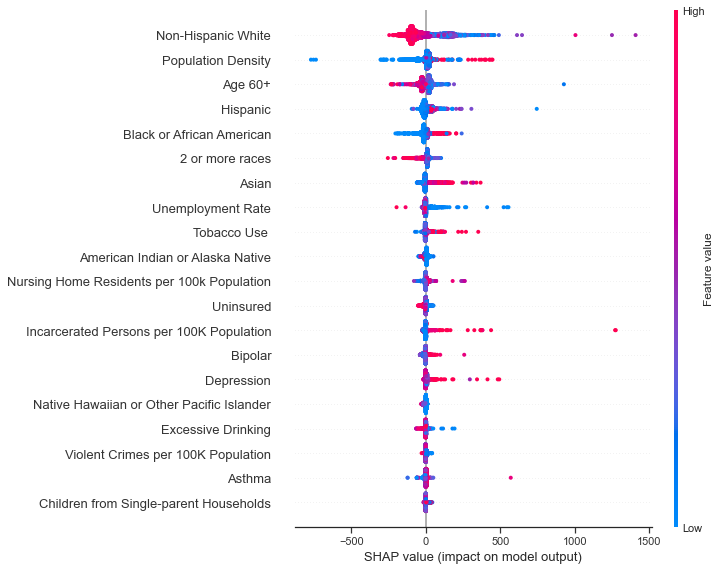

In [25]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

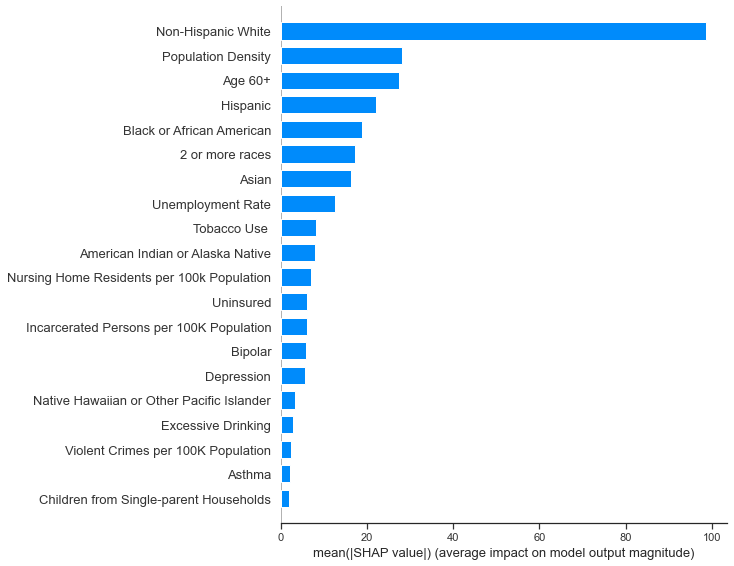

In [26]:
shap.summary_plot(shap_values, X, plot_type="bar")

# Print and plot evaluation metrics (after feature selection)

In [27]:
eval_result = xgboost.cv({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 1000,
                         callbacks=[xgboost.callback.print_evaluation(show_stdv=True)])
eval_result.loc[eval_result["test-rmse-mean"].idxmin()]

[0]	train-rmse:753.01585+36.03709	test-rmse:751.64020+75.62641
[1]	train-rmse:748.93245+35.78518	test-rmse:749.09719+75.72830
[2]	train-rmse:744.90751+35.52426	test-rmse:746.58103+75.82613
[3]	train-rmse:740.78446+35.28184	test-rmse:744.04887+75.86710
[4]	train-rmse:736.80306+35.01799	test-rmse:741.63770+75.90154
[5]	train-rmse:732.83913+34.83814	test-rmse:739.18016+76.04440
[6]	train-rmse:728.94460+34.58033	test-rmse:736.81311+76.14974
[7]	train-rmse:724.90120+34.42089	test-rmse:734.52030+76.16614
[8]	train-rmse:721.07334+34.18806	test-rmse:732.29869+76.21627
[9]	train-rmse:717.34664+33.94774	test-rmse:730.04126+76.37946
[10]	train-rmse:713.67303+33.74619	test-rmse:727.88155+76.48973
[11]	train-rmse:709.83521+33.66745	test-rmse:725.70579+76.50019
[12]	train-rmse:706.17472+33.54052	test-rmse:723.53198+76.49969
[13]	train-rmse:702.61648+33.40225	test-rmse:721.40924+76.68935
[14]	train-rmse:698.82208+33.20219	test-rmse:719.42100+76.59671
[15]	train-rmse:695.28385+33.07875	test-rmse:717.3

[128]	train-rmse:428.46459+15.22717	test-rmse:612.35974+70.91280
[129]	train-rmse:426.99627+15.17001	test-rmse:612.03735+70.82543
[130]	train-rmse:425.37635+14.97921	test-rmse:611.64254+70.57492
[131]	train-rmse:423.93383+14.90509	test-rmse:611.36672+70.46128
[132]	train-rmse:422.34739+14.69999	test-rmse:611.14229+70.29442
[133]	train-rmse:420.94076+14.61071	test-rmse:610.85492+70.22511
[134]	train-rmse:419.42165+14.42755	test-rmse:610.60673+70.02706
[135]	train-rmse:417.95531+14.34609	test-rmse:610.24188+69.89887
[136]	train-rmse:416.46294+14.15233	test-rmse:609.99019+69.65799
[137]	train-rmse:414.94000+13.96317	test-rmse:609.69533+69.43343
[138]	train-rmse:413.53177+13.87691	test-rmse:609.45546+69.30204
[139]	train-rmse:412.06254+13.67643	test-rmse:609.27828+69.11453
[140]	train-rmse:410.73142+13.60770	test-rmse:609.04789+69.06635
[141]	train-rmse:409.30900+13.45112	test-rmse:608.88745+68.83208
[142]	train-rmse:407.97612+13.35248	test-rmse:608.65114+68.69111
[143]	train-rmse:406.5463

[256]	train-rmse:297.96295+7.32054	test-rmse:595.19594+59.42504
[257]	train-rmse:297.38582+7.40109	test-rmse:595.13332+59.41715
[258]	train-rmse:296.64658+7.33370	test-rmse:595.21600+59.27523
[259]	train-rmse:296.09531+7.39808	test-rmse:595.18302+59.21778
[260]	train-rmse:295.51054+7.32868	test-rmse:595.18791+59.19314
[261]	train-rmse:294.92283+7.37587	test-rmse:595.21737+59.02537
[262]	train-rmse:294.28589+7.29455	test-rmse:595.19621+59.06949
[263]	train-rmse:293.79715+7.33016	test-rmse:595.10527+59.03113
[264]	train-rmse:293.26821+7.38464	test-rmse:595.18009+58.80531
[265]	train-rmse:292.74671+7.40114	test-rmse:595.09949+58.74592
[266]	train-rmse:292.15800+7.54130	test-rmse:595.19775+58.56178
[267]	train-rmse:291.71861+7.59886	test-rmse:595.13003+58.52832
[268]	train-rmse:291.22052+7.69021	test-rmse:595.10105+58.51741
[269]	train-rmse:290.60598+7.60099	test-rmse:595.24463+58.29327
[270]	train-rmse:290.14331+7.61192	test-rmse:595.31529+58.27141
[271]	train-rmse:289.69937+7.67348	test-

[385]	train-rmse:242.47396+9.44352	test-rmse:593.85862+55.19070
[386]	train-rmse:242.19809+9.30036	test-rmse:593.89301+55.15720
[387]	train-rmse:241.80484+9.31516	test-rmse:593.89803+55.13193
[388]	train-rmse:241.54952+9.30400	test-rmse:593.92049+55.10164
[389]	train-rmse:241.22292+9.28625	test-rmse:593.94779+55.09464
[390]	train-rmse:240.84403+9.23278	test-rmse:593.97561+55.06650
[391]	train-rmse:240.47681+9.28535	test-rmse:593.98804+55.01592
[392]	train-rmse:240.01234+9.29170	test-rmse:593.96322+54.99581
[393]	train-rmse:239.73435+9.34454	test-rmse:593.99919+54.99222
[394]	train-rmse:239.26125+9.30873	test-rmse:594.00968+54.94912
[395]	train-rmse:238.86626+9.20196	test-rmse:594.00338+54.94310
[396]	train-rmse:238.55934+9.18167	test-rmse:594.02641+54.95629
[397]	train-rmse:238.30312+9.12185	test-rmse:594.00295+54.94081
[398]	train-rmse:238.06614+9.27825	test-rmse:593.95776+54.88355
[399]	train-rmse:237.77987+9.34222	test-rmse:593.95217+54.85021
[400]	train-rmse:237.44736+9.37857	test-

[514]	train-rmse:208.53111+9.55446	test-rmse:593.24060+53.35868
[515]	train-rmse:208.27806+9.54149	test-rmse:593.22823+53.34378
[516]	train-rmse:208.08050+9.56290	test-rmse:593.24259+53.33722
[517]	train-rmse:207.88493+9.60068	test-rmse:593.22591+53.34816
[518]	train-rmse:207.66727+9.59377	test-rmse:593.21415+53.32870
[519]	train-rmse:207.40679+9.62624	test-rmse:593.16518+53.31786
[520]	train-rmse:207.17866+9.63334	test-rmse:593.16785+53.30792
[521]	train-rmse:206.88743+9.50627	test-rmse:593.17690+53.30848
[522]	train-rmse:206.73253+9.48201	test-rmse:593.18264+53.27892
[523]	train-rmse:206.54889+9.41355	test-rmse:593.18636+53.26978
[524]	train-rmse:206.32988+9.33185	test-rmse:593.15603+53.28555
[525]	train-rmse:206.15116+9.36620	test-rmse:593.16988+53.27096
[526]	train-rmse:205.95053+9.37987	test-rmse:593.20203+53.23853
[527]	train-rmse:205.68777+9.36206	test-rmse:593.20778+53.22573
[528]	train-rmse:205.47557+9.41815	test-rmse:593.21832+53.20778
[529]	train-rmse:205.33701+9.40092	test-

[643]	train-rmse:185.21519+6.36179	test-rmse:591.82391+52.57813
[644]	train-rmse:185.02962+6.35114	test-rmse:591.82581+52.59538
[645]	train-rmse:184.86854+6.26734	test-rmse:591.80412+52.60794
[646]	train-rmse:184.69658+6.30307	test-rmse:591.78780+52.60375
[647]	train-rmse:184.48558+6.24878	test-rmse:591.79000+52.60233
[648]	train-rmse:184.28562+6.17173	test-rmse:591.80680+52.57000
[649]	train-rmse:184.16827+6.11997	test-rmse:591.80695+52.58463
[650]	train-rmse:184.02273+6.18751	test-rmse:591.80223+52.58911
[651]	train-rmse:183.89032+6.14732	test-rmse:591.79030+52.58551
[652]	train-rmse:183.65886+6.15133	test-rmse:591.79014+52.58637
[653]	train-rmse:183.49807+6.09991	test-rmse:591.76976+52.59121
[654]	train-rmse:183.34848+6.07881	test-rmse:591.79307+52.56873
[655]	train-rmse:183.18361+6.03974	test-rmse:591.79362+52.55633
[656]	train-rmse:183.01481+6.00101	test-rmse:591.80609+52.55136
[657]	train-rmse:182.81669+5.91215	test-rmse:591.82033+52.54137
[658]	train-rmse:182.59209+5.89785	test-

[772]	train-rmse:164.61548+4.51954	test-rmse:591.31496+52.28298
[773]	train-rmse:164.51521+4.53868	test-rmse:591.32707+52.28797
[774]	train-rmse:164.41326+4.54816	test-rmse:591.33716+52.28211
[775]	train-rmse:164.25224+4.51340	test-rmse:591.33042+52.28843
[776]	train-rmse:164.16185+4.54415	test-rmse:591.33164+52.28758
[777]	train-rmse:164.08912+4.54989	test-rmse:591.30992+52.24933
[778]	train-rmse:163.98303+4.57040	test-rmse:591.31887+52.24353
[779]	train-rmse:163.83983+4.56050	test-rmse:591.31335+52.24706
[780]	train-rmse:163.68537+4.54850	test-rmse:591.32139+52.24698
[781]	train-rmse:163.48571+4.51671	test-rmse:591.32694+52.26411
[782]	train-rmse:163.37174+4.54266	test-rmse:591.33268+52.25104
[783]	train-rmse:163.24862+4.55697	test-rmse:591.33763+52.24601
[784]	train-rmse:163.11297+4.60526	test-rmse:591.35231+52.24500
[785]	train-rmse:162.99812+4.56644	test-rmse:591.34963+52.23498
[786]	train-rmse:162.83044+4.55611	test-rmse:591.34292+52.23117
[787]	train-rmse:162.70557+4.56270	test-

[901]	train-rmse:147.64075+5.13453	test-rmse:590.71806+51.93671
[902]	train-rmse:147.55157+5.13916	test-rmse:590.71490+51.93352
[903]	train-rmse:147.42361+5.13024	test-rmse:590.71830+51.90478
[904]	train-rmse:147.30185+5.10618	test-rmse:590.72021+51.90036
[905]	train-rmse:147.14253+5.10346	test-rmse:590.70573+51.91243
[906]	train-rmse:147.01551+5.08823	test-rmse:590.69790+51.90640
[907]	train-rmse:146.92251+5.07222	test-rmse:590.69686+51.89910
[908]	train-rmse:146.80386+5.05874	test-rmse:590.68563+51.91258
[909]	train-rmse:146.67627+5.10788	test-rmse:590.69346+51.89069
[910]	train-rmse:146.53399+5.08987	test-rmse:590.67879+51.87692
[911]	train-rmse:146.41787+5.09102	test-rmse:590.69684+51.88953
[912]	train-rmse:146.32435+5.08506	test-rmse:590.68237+51.89325
[913]	train-rmse:146.20135+5.13784	test-rmse:590.68201+51.87942
[914]	train-rmse:146.04027+5.18170	test-rmse:590.65979+51.87859
[915]	train-rmse:145.91618+5.17101	test-rmse:590.66158+51.87720
[916]	train-rmse:145.78594+5.17452	test-

train-rmse-mean    139.680634
train-rmse-std       5.813170
test-rmse-mean     590.540792
test-rmse-std       51.641391
Name: 968, dtype: float64

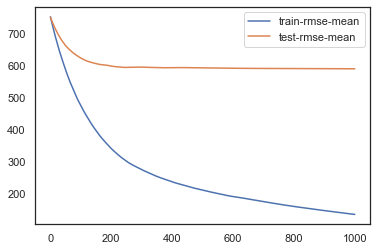

In [28]:
eval_result.plot(y=["train-rmse-mean", "test-rmse-mean"])